In [7]:
'''
Created on Jan 4, 2013

@author: Carl Raymond
'''

from itertools import count
from sys import exit

def enum(**values):
    return type('Enum', (), values)

Tokens = enum(LPAREN=1, RPAREN=2, COMMA=3, SEMI=4, NAME=5)

def nameGenerator(prefix):
    for n in count(1):
        yield prefix + str(n)
        
def tokenize(treespec):
    name = []
    for c in treespec:
        if c == '(':
            yield (Tokens.LPAREN,)
        elif c == ')':
            yield (Tokens.NAME, "".join(name))
            name = []
            yield (Tokens.RPAREN,)
        elif c == ',':
            yield (Tokens.NAME, "".join(name))
            name = []
            yield (Tokens.COMMA,)
        elif c == ';':
            yield (Tokens.NAME, "".join(name))
            name = []
            yield (Tokens.SEMI,)
        else:
            name.append(c)

def specToGraph(spec):
    # Parse the spec, and build tree representation: a dictionary mapping a node to its parent node.
    graph = {}
    stack = []
    children = []
    name = None
    assignedNames = nameGenerator("V")
    prevToken = None
    for token in tokenize(treespec):
        ttype = token[0]
        if ttype == Tokens.LPAREN:
            stack.append(children)
            children = []
        elif ttype == Tokens.COMMA:
            pass
        elif ttype == Tokens.RPAREN:
            lastchildren = children
            children = stack.pop()
        elif ttype == Tokens.NAME:
            name = token[1] or assignedNames.__next__()
            if prevToken and prevToken[0] == Tokens.RPAREN:
                for child in lastchildren:
                    graph[child] = name
            children.append(name)
        elif ttype == Tokens.SEMI:
            pass

        prevToken = token
    return graph

def graphDistance(graph, node1, node2):
    # Follow chain of ancestors of node1 and node2 until they meet in a common ancestor.
    # Create list of ancestors of node1
    an = node1
    ancestors1 = []
    while an:
        ancestors1.append(an)
        if an not in graph: break;
        an = graph[an]
    
    # Create list of ancestors of node2. Short circuit when an ancestor is in ancestors1.
    an = node2
    ancestors2 = []
    while an:
        ancestors2.append(an)
        if an in ancestors1: return ancestors1.index(an) + len(ancestors2) - 1
        an = graph[an]
    
    
    
def writeGraphviz(graph, filename):
    # Write graphviz from internal representation
    with open(filename, "w+") as gvfile:
        gvfile.write("graph G { graph [overlap=false, splines=false]; \n")
        for node, parent in graph.items():
            gvfile.write ("{0} [label=\"{1}\"];\n".format(node, node.replace("_", "\\n")))
            gvfile.write("{0} -- {1}\n".format(node, parent))
        gvfile.write("}\n")

def inputPairs(filename):
    with open(filename) as specs:
        nonblanks = iter([l for l in (line.strip() for line in specs) if l])
        while True:
            try:
                yield nonblanks.__next__(), nonblanks.__next__()
            except StopIteration:
                return
        
                
for treespec, targets in inputPairs("data/rosalind_nwck.txt"):
    targetnodes = [ name for name in targets.strip().split()]
    #print(treespec)
    #print(targetnodes)
    graph = specToGraph(treespec)
    print(graphDistance(graph, targetnodes[0], targetnodes[1]))
    writeGraphviz(graph, "NWCK.gv")



18
15
10
9
2
22
15
17
21
26
12
23
2
2
15
17
36
2
5
14
2
32
13
11
12
40
82
7
9
17
24
2
2
7
2
2
13


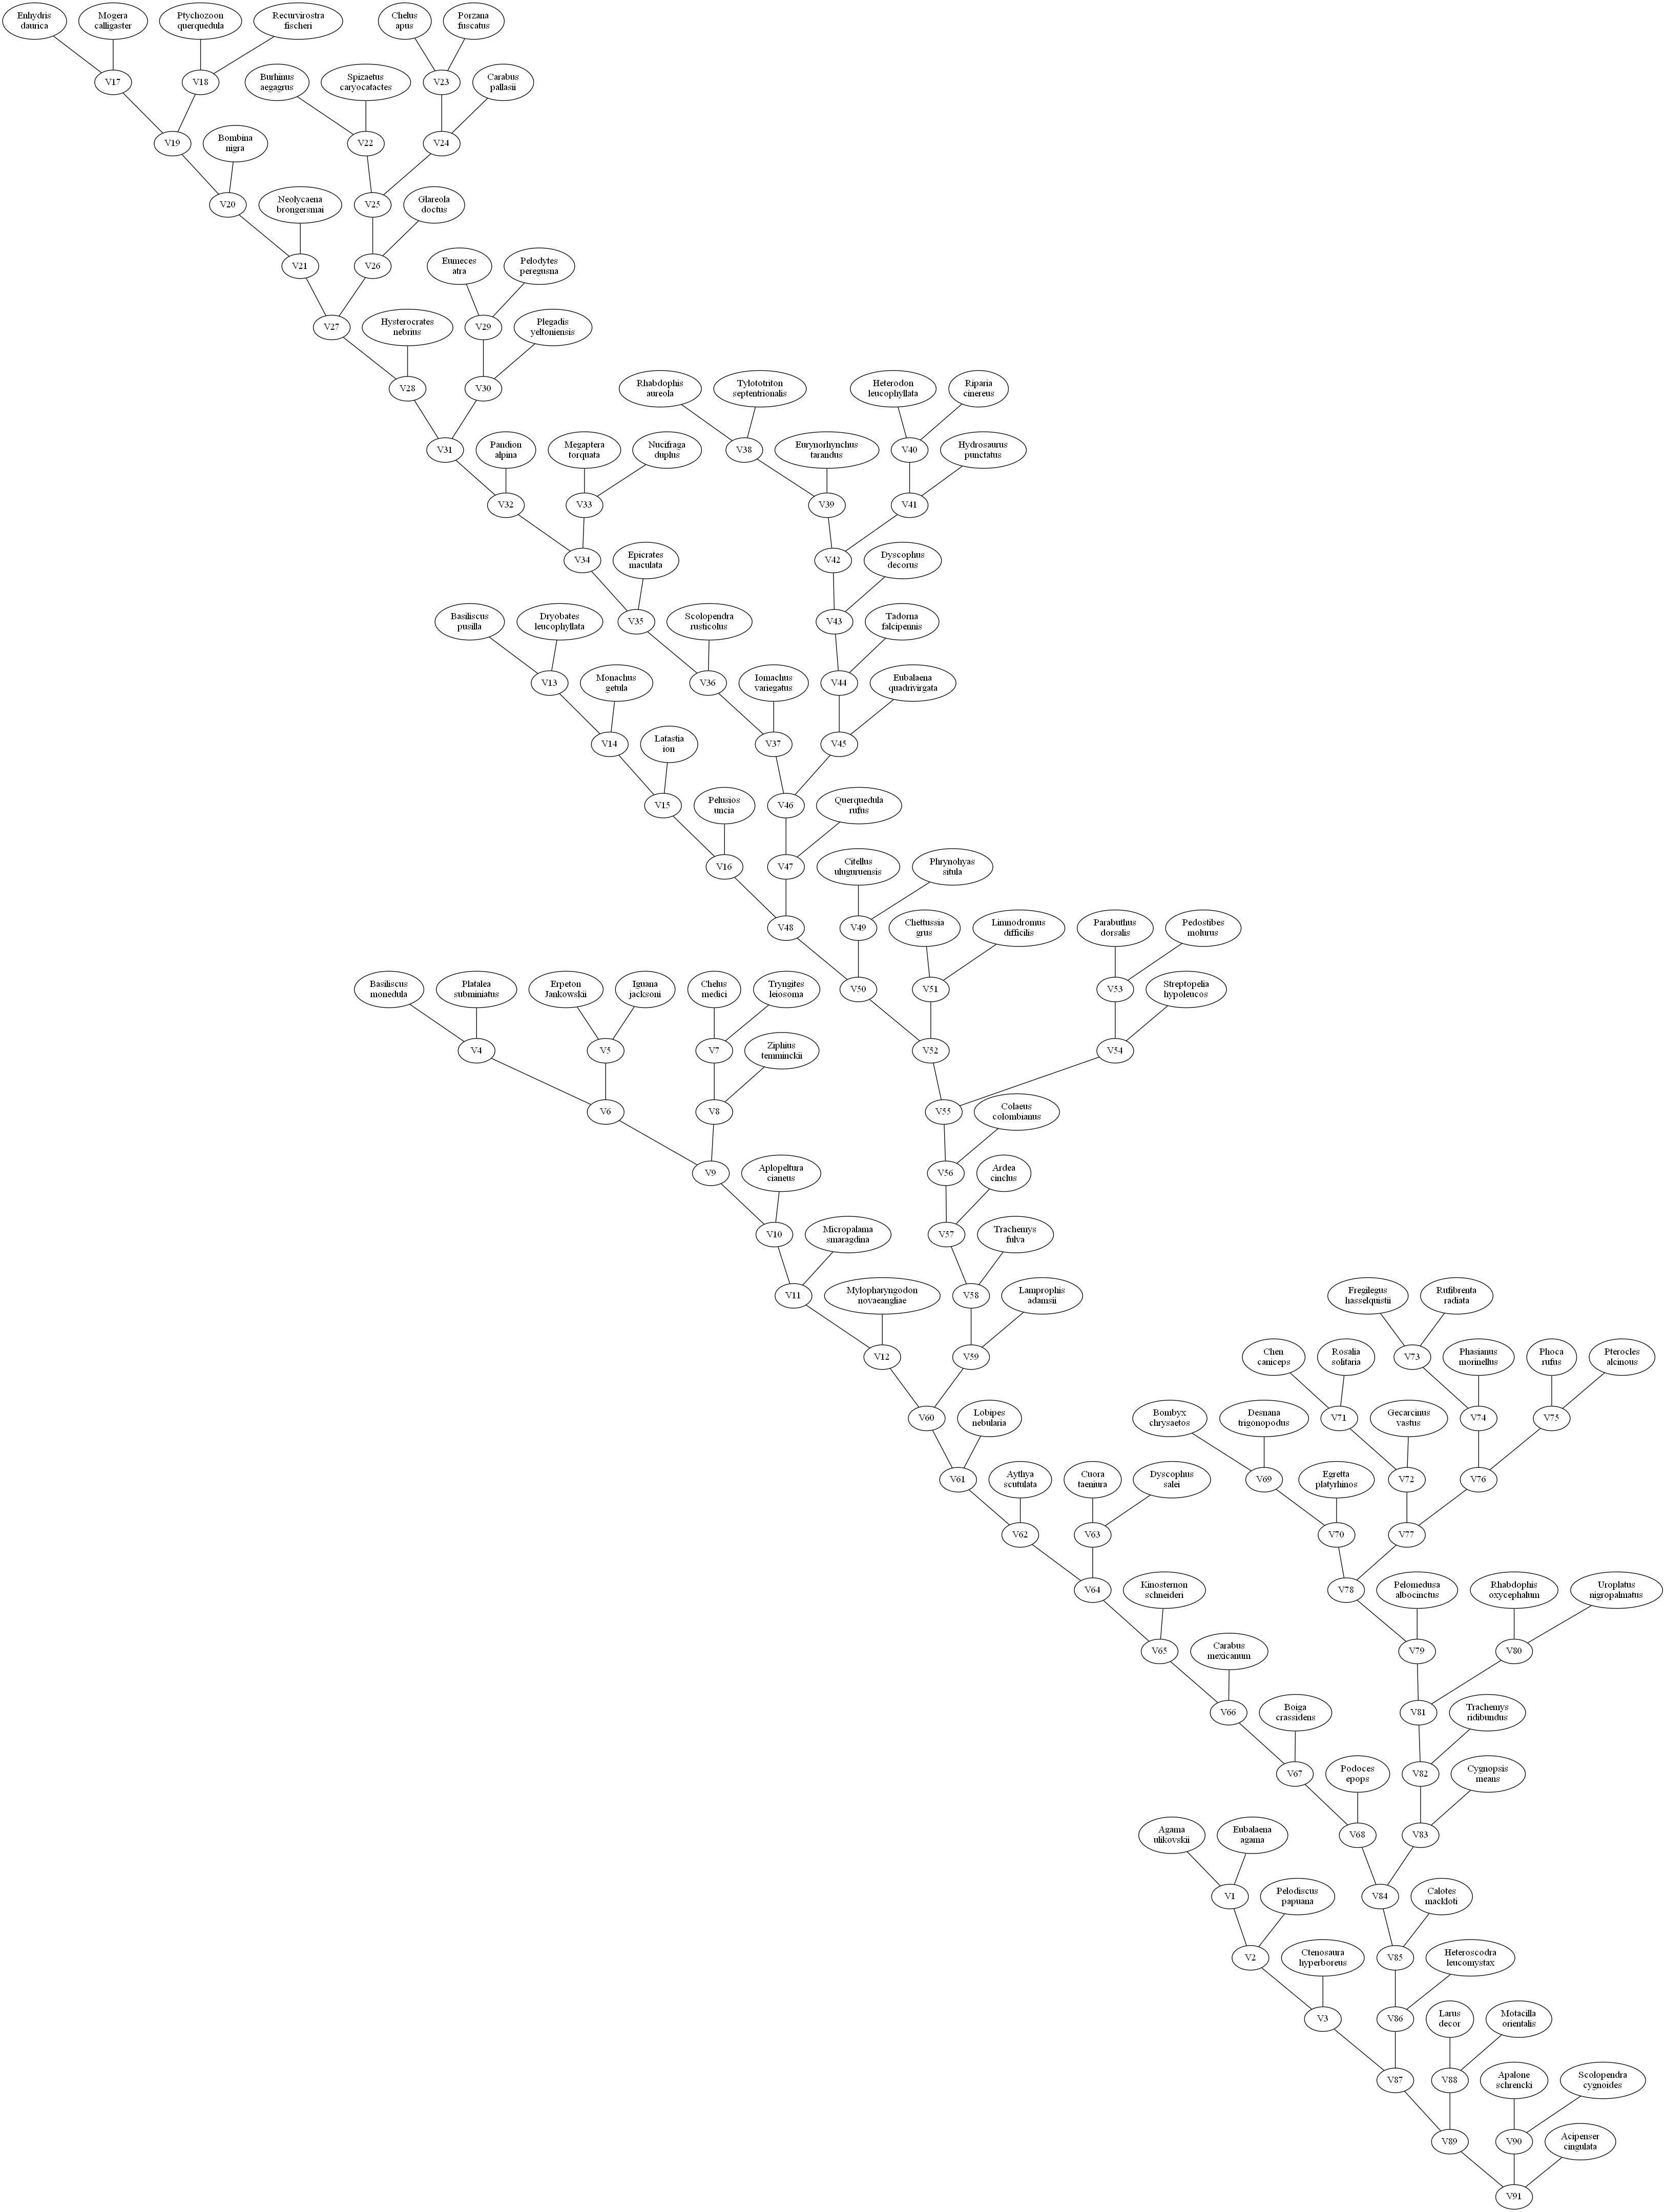

In [8]:
from IPython.display import Image
import graphviz

graphviz.render('dot', 'png', 'NWCK.gv')
Image('NWCK.gv.png')